In [1]:
import pandas as pd

data = pd.read_csv('./data/titanic/train.csv')
data.head()

y = data["Survived"]
X = data[["Pclass","Sex","Fare", "Embarked"]]

In [2]:
X = pd.get_dummies(X)
X.head()

,Pclass,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,7.2500,0,1,0,0,1
1,1,71.2833,1,0,1,0,0
2,3,7.9250,1,0,0,0,1
3,1,53.1000,1,0,0,0,1
4,3,8.0500,0,1,0,0,1


In [3]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

steps = [
    StandardScaler(),
    Normalizer(),
#    PCA(n_components=3)
]

pipe = make_pipeline(*steps)

X = pipe.fit_transform(X)

df = pd.DataFrame(X)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
y.value_counts()[1] / len(y)

0.3838383838383838

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(891, 7) (891,)
(712, 7) (179, 7) (712,) (179,)


In [7]:
y_train.value_counts()[1] / len(y_train)

0.3806179775280899

In [8]:
from sklearn.linear_model import LogisticRegression

# Entrena el modelo
clf = LogisticRegression().fit(X, y)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
pred = clf.predict(X_test)

In [10]:
import numpy as np
scores = pd.DataFrame({
    "predicted":pred,
    "gt":y_test
})
scores["diff"] = np.abs(scores["predicted"]-scores["gt"])
scores["diff"].sum()/ len(y_test)

0.2011173184357542

,predicted,probaLife,probaDead
883,0,0.165701,0.834299
270,0,0.417362,0.582638
145,0,0.191654,0.808346
242,0,0.165701,0.834299
820,1,0.852037,0.147963


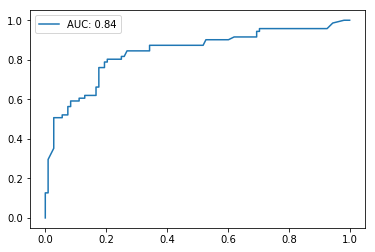

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_score = clf.predict_proba(X_test)

#print(y_score)
roc = roc_curve(y_test, y_score[:,1])
display(pd.DataFrame({
    "predicted":y_test,
    "probaLife":y_score[:,1],
    "probaDead":y_score[:,0]
}).head())

plt.plot(roc[0],roc[1])
plt.legend([f"AUC: {round(roc_auc_score(y_test, y_score[:,1]),2)}"])